# Project 1: CT Image Reconstruction

### 1) Use the filtered back projection method to reconstruct a cross-sectional slice pass through the center position (500,750), as shown in Fig.1(C) of the sample. Show the result of the sinogram and the image slice obtained in the report along with your Matlab program. You can use Dataset_Crystal_360 for your program test and debugging.

In [1]:
# package imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import iradon
from skimage.transform import radon
from matplotlib.animation import FuncAnimation

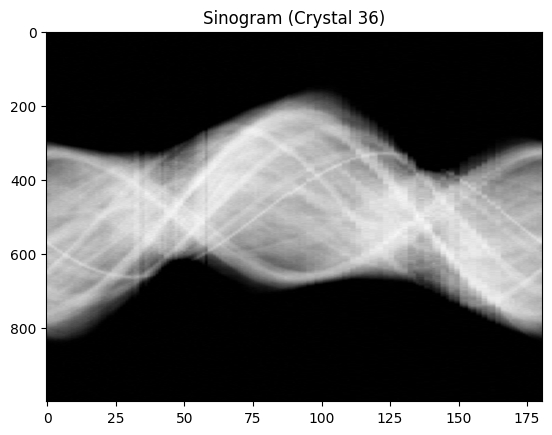

In [2]:
# crystal images directory
directory = 'Database_Cyrstal_36__export'

# Load images in sorted order (from 0 to 360 degrees, 2-degree increments)
images = []

for filename in sorted(os.listdir(directory)):
    if filename.endswith('.bmp'):
        img_path = os.path.join(directory, filename)
        
        # load in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        
        # rotate the image 90 degrees counterclockwise
        img_rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
        
        images.append(img_rotated)

images = np.array(images)

# Sinogram generation
center_column_index = images.shape[2] // 2  # Get the middle column index
sinogram = images[:, :, center_column_index]  # Extract the center column from each image

sinogram_90 = np.rot90(sinogram, k=-1) # rotate (for visual plot only)

# display
plt.imshow(sinogram_90, cmap='gray', aspect='auto')
plt.title('Sinogram (Crystal 36)')
plt.show()

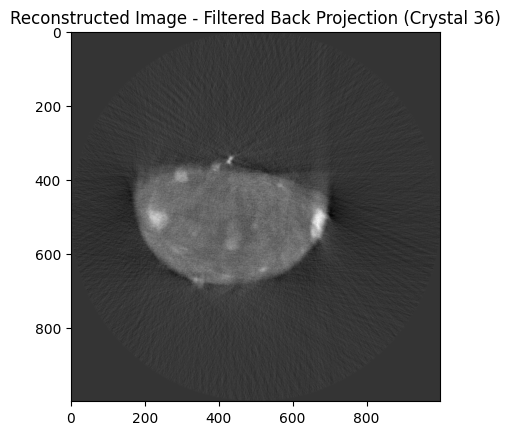

Original images shape: (1000, 1000)


In [3]:
num_projections = sinogram.shape[0] # Number of projections (181)

# Define theta for 181 projections (from 0 to 360 degrees)
theta = np.linspace(0., 360., num_projections, endpoint=True) 

# Transpose the sinogram so that the number of projections (181) is along the correct axis
sinogram_corrected = sinogram.T  # Shape is now (1000, 181)

# Apply the inverse radon transform (Filtered Back Projection)
reconstruction_fbp = iradon(sinogram_corrected, theta=theta, filter_name='hann') # hann is the prettiest filter ...

flipped_image = np.flipud(np.fliplr(reconstruction_fbp))

# Display the reconstructed image
plt.imshow(flipped_image, cmap='gray')
plt.title('Reconstructed Image - Filtered Back Projection (Crystal 36)')
plt.show()

# shape
print('Original images shape:', flipped_image.shape)

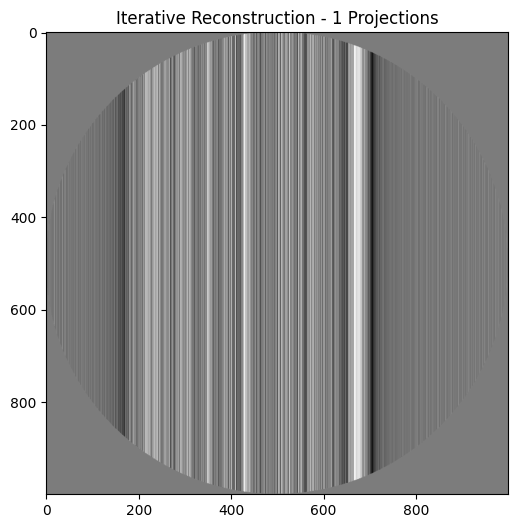

In [4]:
# GIF Animation of Iterative Reconstruction

sinogram_corrected = sinogram.T  

# Number of projections (181)
num_projections = sinogram_corrected.shape[1]

# Define theta for projections from 0 to 360 degrees
theta = np.linspace(0., 360., num_projections, endpoint=True)

# Perform initial reconstruction to get the image size
reconstruction_fbp = iradon(sinogram_corrected, theta=theta, filter_name='hann')
image_shape = reconstruction_fbp.shape  # Should be (1000, 1000)

# Initialize figure for animation
fig, ax = plt.subplots(figsize=(6, 6))
initial_image = np.zeros(image_shape)
im = ax.imshow(initial_image, cmap='gray', vmin=0, vmax=1)
ax.set_aspect('equal')  # Ensure aspect ratio is equal
ax.set_title('Iterative Reconstruction')

# Function to update the reconstruction frame-by-frame
def update(i):
    theta_partial = theta[:i+1]  # Use first i+1 projections
    sinogram_partial = sinogram_corrected[:, :i+1]  # Corresponding part of the sinogram

    reconstruction_partial = iradon(
        sinogram_partial,
        theta=theta_partial,
        filter_name='hann',
        output_size=image_shape[0]
    )

    # flip for visual
    flipped_image = np.flipud(np.fliplr(reconstruction_partial))

    im.set_array(flipped_image)
    im.set_clim(np.min(flipped_image), np.max(flipped_image))  # Update color limits
    ax.set_title(f'Iterative Reconstruction - {i+1} Projections')
    return [im]

ani = FuncAnimation(fig, update, frames=num_projections, interval=100, blit=False)
ani.save('Reconstructed_Image_Animation.gif', writer='pillow')

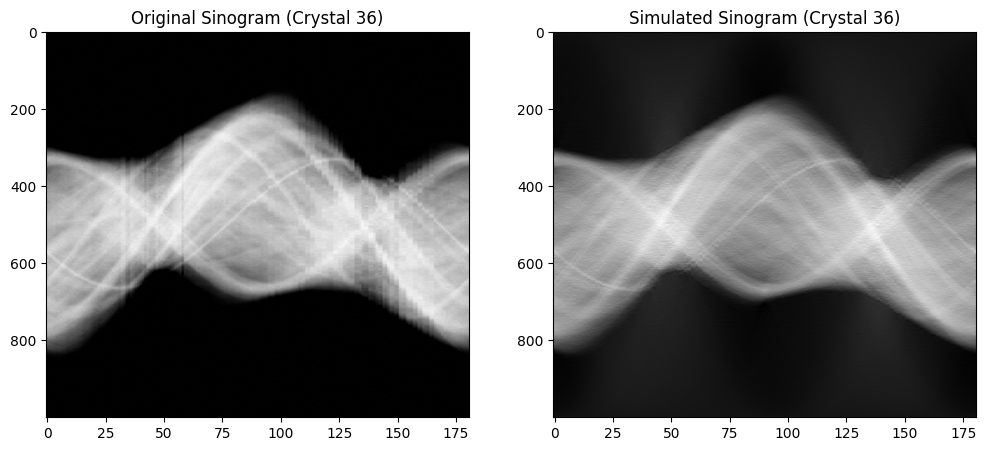

Original sinogram shape: (181, 1000)
Simulated sinogram shape: (181, 1000)


In [5]:
# verify that reconstruction is correct. Create sinogram from the reconstructed image and compare it to the original sinogram
simulated_sinogram = radon(reconstruction_fbp, theta=theta, circle=True)

simulated_sinogram_flipped = np.rot90(simulated_sinogram, k=1) # rotate (for visual plot only)

plt.figure(figsize=(12, 5))

# Plot the original sinogram
plt.subplot(1, 2, 1)
plt.imshow(sinogram_90, cmap='gray', aspect='auto')
plt.title("Original Sinogram (Crystal 36)")

# Plot the simulated sinogram
plt.subplot(1, 2, 2)
plt.imshow(np.swapaxes(simulated_sinogram_flipped, 0, 1), cmap='gray', aspect='auto')
plt.title("Simulated Sinogram (Crystal 36)")

plt.show()

# Print the shapes to ensure they're consistent
print("Original sinogram shape:", sinogram.shape)
print("Simulated sinogram shape:", np.swapaxes(simulated_sinogram, 0, 1).shape)

### 2) Use the same filtered back project MATLab program that you programmed above 1), perform the image reconstruction of the Dataset_Insect_Head_360 x-ray images, and show the sonogram and cross-sectional slice image of the insect head.

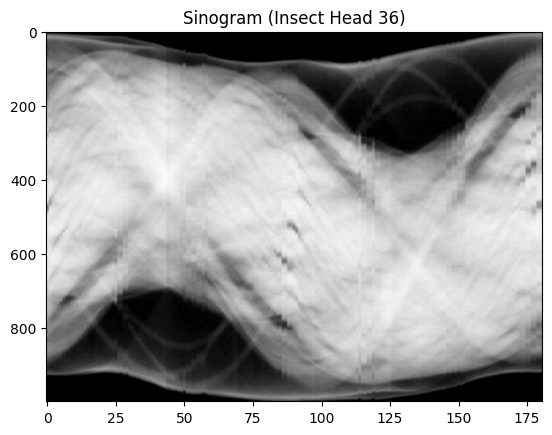

In [6]:
# Code is same from now on but with other directories and image files.

directory = 'Database_Insect_Head_36__export'

# load tif images
images = []

for filename in sorted(os.listdir(directory)):
    if filename.endswith('.tif'):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)          
        img_rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)  
        images.append(img_rotated)

images = np.array(images)
center_column_index = images.shape[2] // 2  
sinogram = images[:, :, center_column_index]  

sinogram_90 = np.rot90(sinogram, k=-1) 
sinogram_90_flipped = np.flipud(sinogram_90)

plt.imshow(sinogram_90_flipped, cmap='gray', aspect='auto')
plt.title('Sinogram (Insect Head 36)')
plt.show()

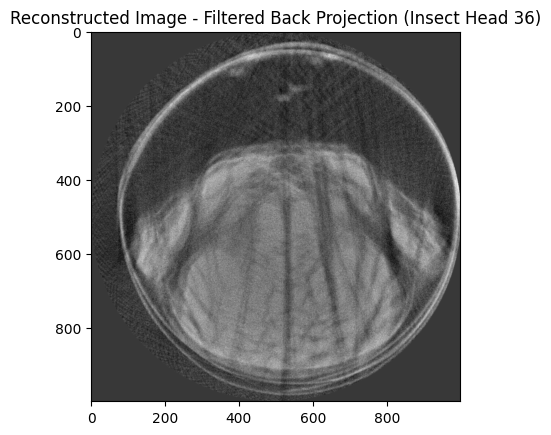

In [7]:
num_projections = sinogram.shape[0] 

theta = np.linspace(0., 360., num_projections, endpoint=True)  

sinogram_corrected = sinogram.T  # Shape is now (1000, 181)

# Apply the inverse radon transform (Filtered Back Projection)
reconstruction_fbp = iradon(sinogram_corrected, theta=theta, filter_name='hann')

# Display the reconstructed image
plt.imshow(reconstruction_fbp, cmap='gray')
plt.title('Reconstructed Image - Filtered Back Projection (Insect Head 36)')
plt.show()

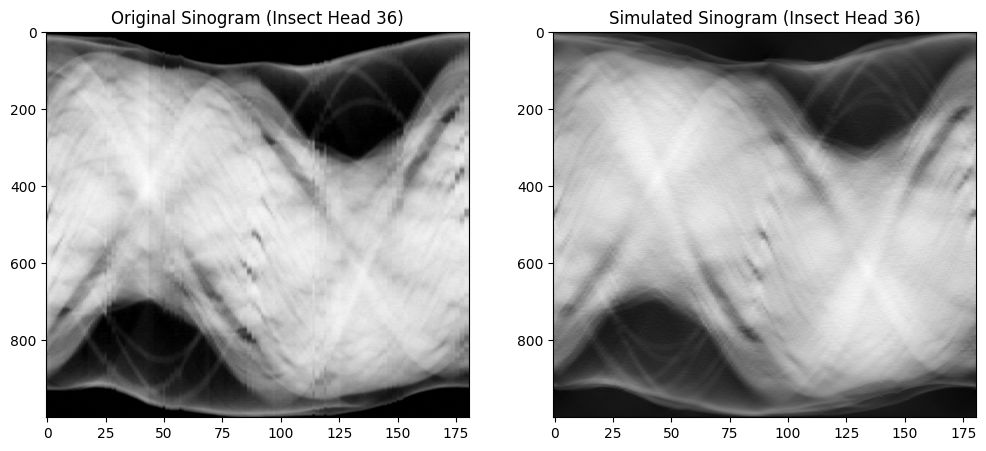

Original sinogram shape: (181, 1000)
Simulated sinogram shape: (181, 1000)


In [8]:
simulated_sinogram = radon(reconstruction_fbp, theta=theta, circle=True)
simulated_sinogram_90 = np.rot90(simulated_sinogram, k=-1) # rotate (for visual plot only)
simulated_sinogram_90_flipped = np.flipud(simulated_sinogram_90) # flip vertically (for visual plot only)


# Create a larger figure for better comparison
plt.figure(figsize=(12, 5))

# Plot the original sinogram
plt.subplot(1, 2, 1)
plt.imshow(sinogram_90_flipped, cmap='gray', aspect='auto')
plt.title("Original Sinogram (Insect Head 36)")

# Plot the simulated sinogram, with axes explicitly swapped
plt.subplot(1, 2, 2)
plt.imshow(np.swapaxes(simulated_sinogram_90_flipped, 0, 1), cmap='gray', aspect='auto')
plt.title("Simulated Sinogram (Insect Head 36)")

# Show the plots
plt.show()

# Print the shapes to ensure they're consistent
print("Original sinogram shape:", sinogram.shape)
print("Simulated sinogram shape:", np.swapaxes(simulated_sinogram, 0, 1).shape)

### 3) Use the same program and apply another dataset that has only 180 degrees of projects to reconstruct a slice pass through the center position (500,750) of the sample. Show the results of the sonogram and the image slice. You can use Dataset_Crystal_180 to run and obtain the results. Note that you need to rotate the raw images by 90 degrees (from horizontal to vertical views) so the format will be the same.

Number of projections: 91


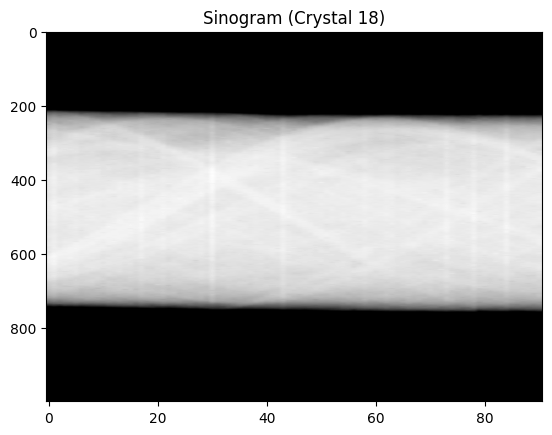

In [9]:
# this directory has 91 images
directory = 'Dataset_Cystal_18__export'

# Load the BMP images in sorted order (from 0 to 180 degrees, 2-degree increments)
images = []

for filename in sorted(os.listdir(directory)):
    if filename.endswith('.bmp'):
        img_path = os.path.join(directory, filename)
        
        # Load the image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)

images = np.array(images)

# should be 91
print(f"Number of projections: {images.shape[0]}")

# Sinogram generation
center_column_index = images.shape[2] // 2  # Get the middle column index
sinogram = images[:, :, center_column_index]  # Extract the center column from each image
sinogram_90 = np.rot90(sinogram, k=-1)  # Rotate for visual purposes

# Display the sinogram
plt.imshow(sinogram_90, cmap='gray', aspect='auto')
plt.title('Sinogram (Crystal 18)')
plt.show()

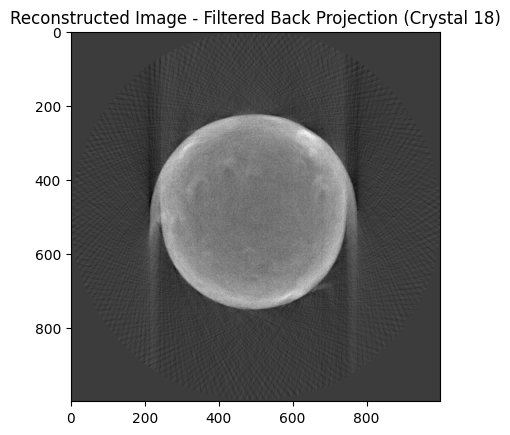

In [10]:
num_projections = sinogram.shape[0]

theta = np.linspace(0., 180., num_projections, endpoint=True) 

sinogram_corrected = sinogram.T  # Shape is now (1000, 91)

# Apply the inverse radon transform (Filtered Back Projection)
reconstruction_fbp = iradon(sinogram_corrected, theta=theta, filter_name='hann') # hann is the prettiest filter ...

flipped_image = np.flipud(np.fliplr(reconstruction_fbp))

# Display the reconstructed image
plt.imshow(flipped_image, cmap='gray')
plt.title('Reconstructed Image - Filtered Back Projection (Crystal 18)')
plt.show()

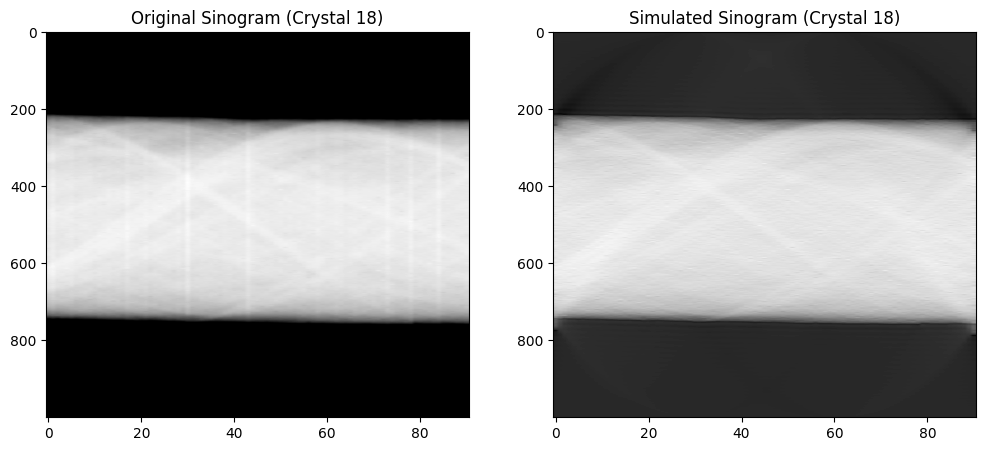

In [11]:
# Verify with original sinogram
simulated_sinogram = radon(reconstruction_fbp, theta=theta, circle=True)

simulated_sinogram_flipped = np.rot90(simulated_sinogram, k=1) # rotate (for visual plot only)

plt.figure(figsize=(12, 5))

# Plot the original sinogram
plt.subplot(1, 2, 1)
plt.imshow(sinogram_90, cmap='gray', aspect='auto')
plt.title("Original Sinogram (Crystal 18)")

# Plot the simulated sinogram
plt.subplot(1, 2, 2)
plt.imshow(np.swapaxes(simulated_sinogram_flipped, 0, 1), cmap='gray', aspect='auto')
plt.title("Simulated Sinogram (Crystal 18)")

plt.show()

## Experimental. Creating 3D volume from 2D slices.

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.transform import iradon
from tqdm import tqdm
import pyvista as pv

images = []
directory = 'Database_Cyrstal_36__export' 

for filename in sorted(os.listdir(directory)):
    if filename.endswith('.bmp'):
        img_path = os.path.join(directory, filename)

        # load in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

        images.append(img_rotated)

# Convert list of images to a NumPy array for further processing
images = np.array(images)  # Shape: (num_projections, height, width)

num_projections = images.shape[0]

theta = np.linspace(0., 360., num_projections, endpoint=True)

num_slices = images.shape[2]  # Width of the image

# prepare to store reconstructed slices
height = images.shape[1]
volume = np.zeros((num_slices, height, height), dtype=np.float32)  # (num_slices, height, height)

print("Starting slice reconstruction using scikit-image's iradon...")

for slice_index in tqdm(range(num_slices)): # iterate over each slice
    # extract sinogram for the current slice
    sinogram = images[:, :, slice_index]  # Shape: (num_projections, height)
    sinogram_corrected = sinogram.T  # Now shape is (height, num_projections)

    # Perform reconstruction
    reconstruction_slice = iradon(
        sinogram_corrected,
        theta=theta,
        filter_name='hann',
        output_size=height,
        circle=False  # Set to False if object fills the image
    )

    reconstruction_slice = np.flipud(np.fliplr(reconstruction_slice))
    volume[slice_index, :, :] = reconstruction_slice

print("Reconstruction complete.")

# Create a PyVista grid from the 3D volume
print("Creating PyVista grid...")
grid = pv.wrap(volume)
print("PyVista grid created.")

# Create a plotter object
print("Creating PyVista plotter...")
plotter = pv.Plotter(off_screen=True)
plotter.add_volume(grid, opacity='sigmoid', cmap='gray')
print("Volume added to plotter.")

# Set initial camera position
print("Setting camera position...")
plotter.camera_position = 'xy'  # Top-down view
plotter.camera.zoom(1.5)
print("Camera position set.")

# Create a video of rotating the object
print("Creating 3D reconstruction video...")
video_filename = "3D_reconstruction.mp4"
plotter.open_movie(video_filename, framerate=20)
print("Video file opened.")

print("Creating 3D reconstruction video...")
n_frames = 200  # Adjust for video length and smoothness

for angle in tqdm(np.linspace(0, 360, n_frames)):
    plotter.camera.azimuth = angle
    plotter.render()
    plotter.write_frame()

plotter.close()
print(f"3D reconstruction video saved as '{video_filename}'")